<a href="https://colab.research.google.com/github/Rakhan00/Compuer-Vision-Projects/blob/main/Project_CNN_Classification_Ciphar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CNN-Classification of images in Cipher-10 dataset
It consist of 10 classes of different images, every class contain 6000 images.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import cifar10


In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

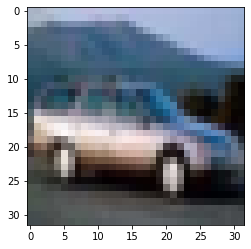

In [5]:
plt.imshow(x_train[4])

## Preprocessing

In [6]:
# feature scalling
x_train.max()

255

In [7]:
x_train.min()

0

In [8]:
x_train=x_train/255

In [9]:
x_test=x_test/255

In [10]:
x_train.shape

(50000, 32, 32, 3)

In [11]:
x_train.max(),x_train.min()

(1.0, 0.0)

In [12]:
x_test.shape

(10000, 32, 32, 3)

In [13]:
# label encoding
from tensorflow.keras.utils import to_categorical


In [14]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [15]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

## Model

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [17]:
model=Sequential()

In [18]:
# for the feature extraction(CNN- convolution->pooling)
# 1st convolution layer
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# 2nd convolution layer
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# 3nd convolution layer
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# Flatten
model.add(Flatten())

#output layer or fully connected layer(ANN)
model.add(Dense(256,activation='relu'))  # for decision making
model.add(Dense(10,activation='softmax')) # for output

In [19]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

In [24]:
model.fit(x_train,y_train,epochs=10,batch_size=200)  

Epoch 1/10
250/250 [==============================] - 111s 442ms/step - loss: 1.1766 - accuracy: 0.5796
Epoch 2/10
250/250 [==============================] - 110s 442ms/step - loss: 1.0910 - accuracy: 0.6122
Epoch 3/10
250/250 [==============================] - 110s 440ms/step - loss: 1.0221 - accuracy: 0.6385
Epoch 4/10
250/250 [==============================] - 110s 439ms/step - loss: 0.9568 - accuracy: 0.6627
Epoch 5/10
250/250 [==============================] - 109s 435ms/step - loss: 0.9069 - accuracy: 0.6801
Epoch 6/10
250/250 [==============================] - 110s 439ms/step - loss: 0.8687 - accuracy: 0.6941
Epoch 7/10
250/250 [==============================] - 110s 439ms/step - loss: 0.8272 - accuracy: 0.7091
Epoch 8/10
250/250 [==============================] - 110s 439ms/step - loss: 0.7852 - accuracy: 0.7241
Epoch 9/10
250/250 [==============================] - 109s 438ms/step - loss: 0.7559 - accuracy: 0.7344
Epoch 10/10
250/250 [==============================] - 110s 438m

In [25]:
y_pred=model.predict(x_test)

313/313 [==============================] - 7s 21ms/step


In [26]:
y_pred[0]

array([9.8869344e-03, 3.3366783e-03, 7.0160828e-03, 8.1693137e-01,
       1.6042424e-03, 9.8033160e-02, 2.0555492e-02, 4.0033797e-04,
       3.6014102e-02, 6.2215156e-03], dtype=float32)

In [27]:
y_pred=np.argmax(y_pred,axis=1)
y_pred[0]

3

In [28]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [29]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.66      0.74      1275
           1       0.80      0.85      0.82       943
           2       0.58      0.59      0.59       996
           3       0.58      0.47      0.52      1243
           4       0.51      0.75      0.60       676
           5       0.64      0.57      0.60      1116
           6       0.74      0.80      0.77       923
           7       0.66      0.81      0.73       813
           8       0.83      0.77      0.80      1077
           9       0.77      0.82      0.79       938

    accuracy                           0.69     10000
   macro avg       0.70      0.71      0.70     10000
weighted avg       0.70      0.69      0.69     10000

